# RFM clustering using Hierarchical Clustering

## Agglomerative

The principle is simple : at start all points are clusters and then using distance we try step by step to group clusters in bigger clusters.

To do that, the algorithm consider two data:
* the intra cluster variance ;
* the inter cluster variance ;

Like in K-Means, we need to define the number of clusters `n_clusters` and the `linkage` property.

The `linkage` property determines which distance to use between observations.

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

rfms = pd.read_csv("./../../../output/rms.csv")

y = rfms["review_score"]

X_train, X_test, y_train, y_test = train_test_split(
    rfms, y, test_size=0.2, random_state=42, stratify=y
)
rfms = X_test

rfms.head()

,recency,frequency,monetary,nb_orders,scoring_R,scoring_F,scoring_M,scoring_RFM,segment_RFM,review_score,review_completion_percentage,review_behavior
4346,425.0,0.066667,116.36,1.0,5,1,3,9,Bons clients,5.0,33.333333,Best Contributor
37624,117.0,0.200000,115.48,1.0,2,4,3,9,Bons clients,5.0,100.000000,Best Contributor
34075,143.0,0.166667,594.42,1.0,2,4,5,11,Bons clients,5.0,66.666667,Best Contributor
89326,322.0,0.083333,83.94,1.0,4,2,2,8,Bons clients,5.0,33.333333,Best Contributor
79142,278.0,0.100000,52.78,1.0,4,2,1,7,Bons clients,5.0,33.333333,Best Contributor


We scale the data:

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_vars = rfms[["recency", "frequency", "monetary", "review_score"]]
scaler.fit(customers_vars)

scaled_customers = scaler.transform(customers_vars)

scaled_customers

array([[ 1.21399954, -0.65576105, -0.22333186,  0.66226064],
       [-0.79757495,  0.06055166, -0.22758092,  0.66226064],
       [-0.62776671, -0.11852652,  2.08496986,  0.66226064],
       ...,
       [ 1.06378456, -0.63017845, -0.13274963,  0.66226064],
       [-1.28740639,  1.67225526,  0.27438755, -3.12695001],
       [ 0.22127447, -0.47668287, -0.37721542,  0.66226064]])

,nb_clusters,silhouette_score
0,2,0.287650
1,3,0.330490
2,4,0.344285
3,5,0.341344
4,6,0.289832
5,7,0.284213


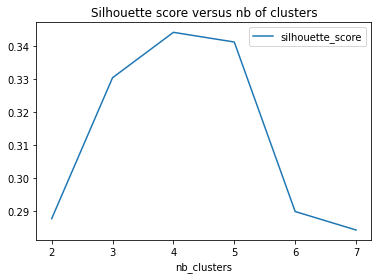

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

report = []
for nb_clusters in range(2, 8):
    agg_clustering = AgglomerativeClustering(n_clusters=nb_clusters).fit(
        scaled_customers
    )

    report.append(
        {
            "nb_clusters": nb_clusters,
            "silhouette_score": metrics.silhouette_score(
                scaled_customers, agg_clustering.labels_
            ),
        }
    )

report = pd.DataFrame(report)
report.plot(
    title="Silhouette score versus nb of clusters",
    x="nb_clusters",
    y="silhouette_score",
)

report

Let's display the dendrogram to confirm that the optimal number of clusters is **4**.


In [23]:
import scipy.cluster.hierarchy as sch
import plotly.figure_factory as ff

fig = ff.create_dendrogram(
    scaled_customers, linkagefun=lambda x: sch.linkage(x, "ward")
)
fig.update_layout(
    title="Hierarchical Clustering",
    xaxis_title="Customers",
    yaxis_title="Euclidean Distance",
    width=700,
    height=700,
)

fig.show()

### Conclusions

The hierarchical clustering is also in favor of 5 clusters to describe the dataset.